# Project 2 
## by Lucas Teo

## Part 1: Wrangling

In [69]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

### Problem 1
Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

In [70]:
# Query for Salaries table
salary_query = "SELECT teamID, yearID, lgID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID ORDER BY teamID"
# Create dataframe for team salaries
team_salaries = pd.read_sql(salary_query, conn)

# Query for Team table
win_percentage_query = "SELECT teamID, yearID, lgID, W as wins, G as games, CAST(W AS FLOAT)*100 / (G) as win_percentage, \
franchID FROM teams GROUP BY teamID, yearID ORDER BY teamID"
# Create data frame for team win percentage
team_win_percentage = pd.read_sql(win_percentage_query, conn)

#Merge two data frame together
join = team_salaries.merge(team_win_percentage, how="inner", left_on=["teamID", "yearID", "lgID"], right_on=["teamID", "yearID", "lgID"])

join

,teamID,yearID,lgID,total_payroll,wins,games,win_percentage,franchID
0,ANA,1997,AL,31135472.0,84,162,51.851852,ANA
1,ANA,1998,AL,41281000.0,85,162,52.469136,ANA
2,ANA,1999,AL,55388166.0,70,162,43.209877,ANA
3,ANA,2000,AL,51464167.0,82,162,50.617284,ANA
4,ANA,2001,AL,47535167.0,75,162,46.296296,ANA
5,ANA,2002,AL,61721667.0,99,162,61.111111,ANA
6,ANA,2003,AL,79031667.0,77,162,47.530864,ANA
7,ANA,2004,AL,100534667.0,92,162,56.790123,ANA
8,ARI,1998,NL,32347000.0,65,162,40.123457,ARI
9,ARI,1999,NL,68703999.0,100,162,61.728395,ARI


The SQL code to compute the total payroll for each team:
##### SELECT teamID, yearID, lgID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID ORDER BY teamID
The SQL code to compute the winning percentage for each team:
##### SELECT teamID, yearID, lgID, W as wins, G as games, CAST(W AS FLOAT)*100 / (G) as win_percentage, franchID FROM teams GROUP BY teamID, yearID ORDER BY teamID

There are missing data in the team_salaries relation.The team_salaries relation are missing some teams that appeared in the team_win_percentage relation. For example, the tuple for team with teamID = ALT is present in the team_win_percentage relation but it is not persent in the team_salaries realtion. Therefore, team_salaries have missing data for that team and this need to be fixed. To dealt with this missing data, I join the two relation with matching teamID and yearID. This can ensure that the resulting relation to include all tuples that have both teamID and yearID exist in both relations and discard tuples without matching teamID and yearID (missing data). 

## Part 2: Exploratory Data Analysis

### Payroll Distribution

### Problem 2

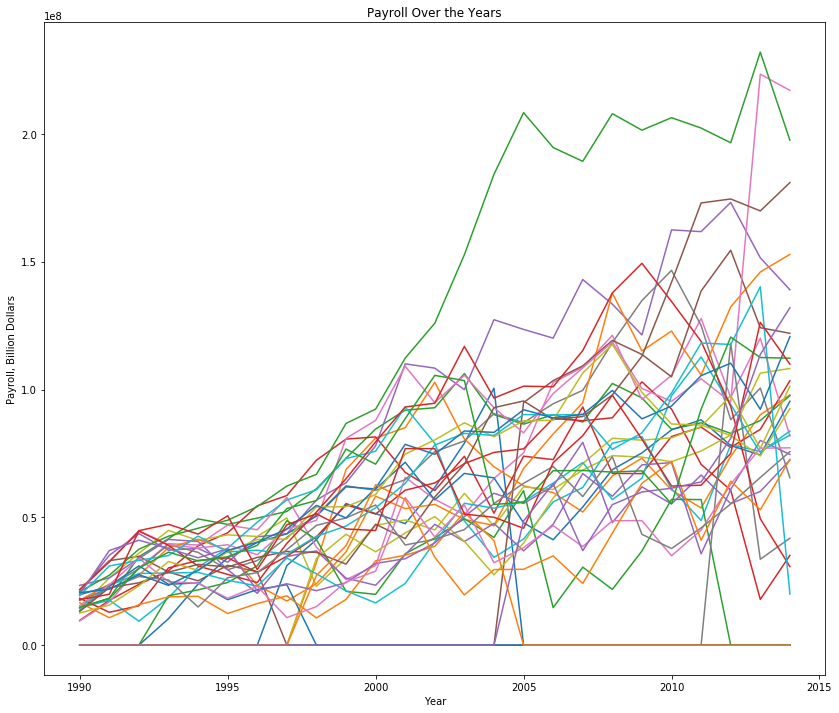

In [61]:
# find all teams a list them in an array
teams = np.unique(join['teamID'].to_numpy())

# create DF for year 1990 to 2014
years = np.arange(1990, 2015)
years_table = pd.DataFrame(columns = ['yearID'], data = years)

data = {}

# plot graph
plt.figure(figsize = (14,12))
plt.title('Payroll Over the Years')
plt.xlabel("Year")
plt.ylabel("Payroll, Billion Dollars")

for i in teams:
    temp = join[['yearID', 'teamID', 'total_payroll']].groupby(['teamID']).get_group(i)
    
    data[i] = years_table.merge(temp, how = 'left', left_on = ['yearID'], right_on = ['yearID'])
    plt.plot(data[i]['yearID'], data[i]['total_payroll'].fillna(value=0))
    
plt.show()

Lines that stay flat at 0 implies that the team did not play during that period of time

### Question 1

What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.

It seems like the trend of the payrolls for each team will increase over time. Some team might experience increase in payroll during the earlier years, but experience decrease in more recent years. However, the overall trend is increasing over time. We could analyze the central tendency such as mean of the payroll over time with this observation. The spread of the team's salaries also increases over time and the range of the payrolls is drastic.


### Problem 3

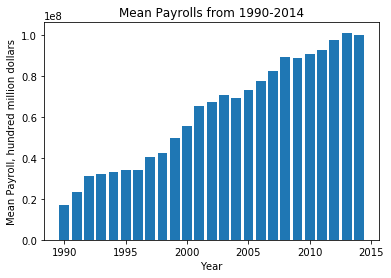

In [62]:
# calculate mean payroll for each year
mean = join[['yearID', 'total_payroll']]
mean_payroll = mean.groupby('yearID').mean()
mean_payroll = mean_payroll[mean_payroll.index >= 1990]

# plot distribution of mean payroll for each year 
plt.title('Mean Payrolls from 1990-2014')
plt.xlabel('Year')
plt.ylabel('Mean Payroll, hundred million dollars')
plt.bar(mean_payroll.index, mean_payroll['total_payroll'])
plt.show()

We can see that the mean payroll is increasing over time.

### Correlation between payroll and winning percentage

### Problem 4

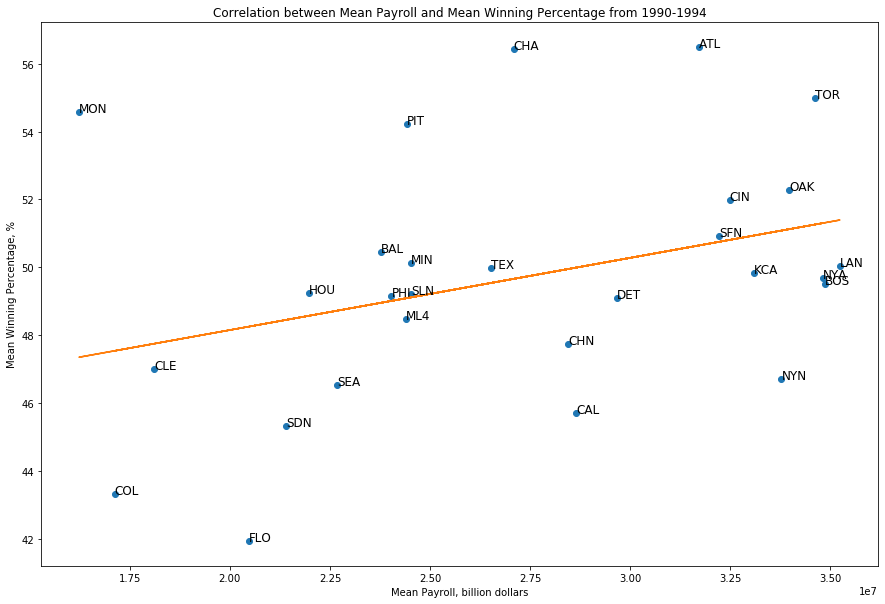

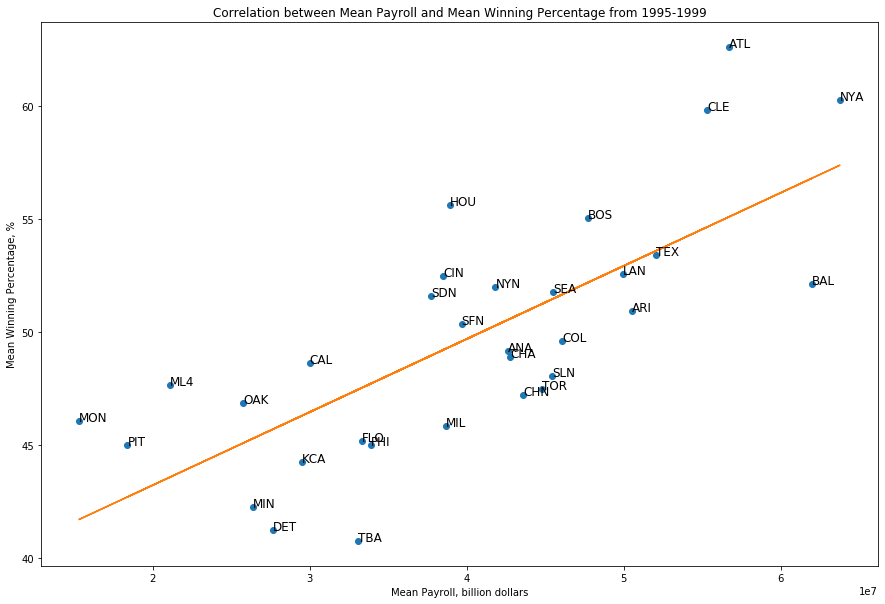

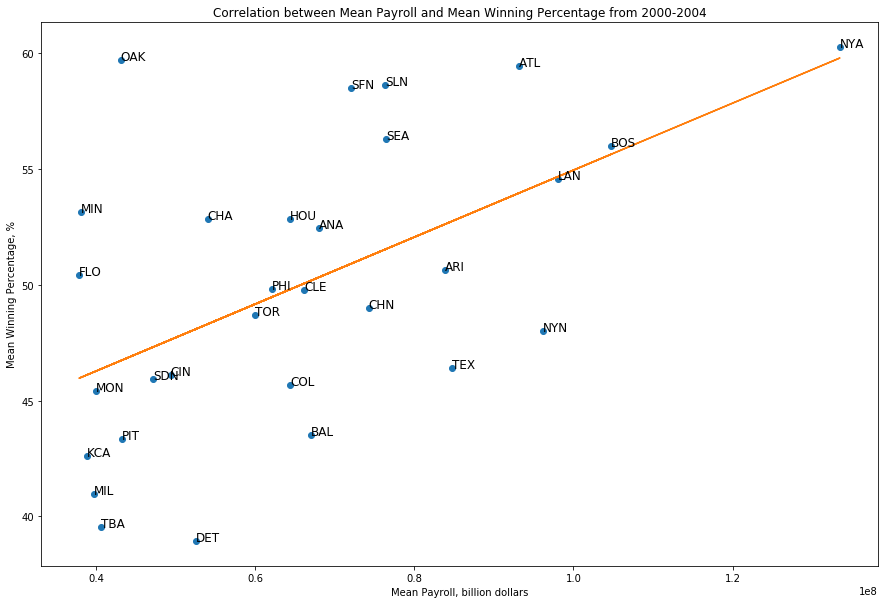

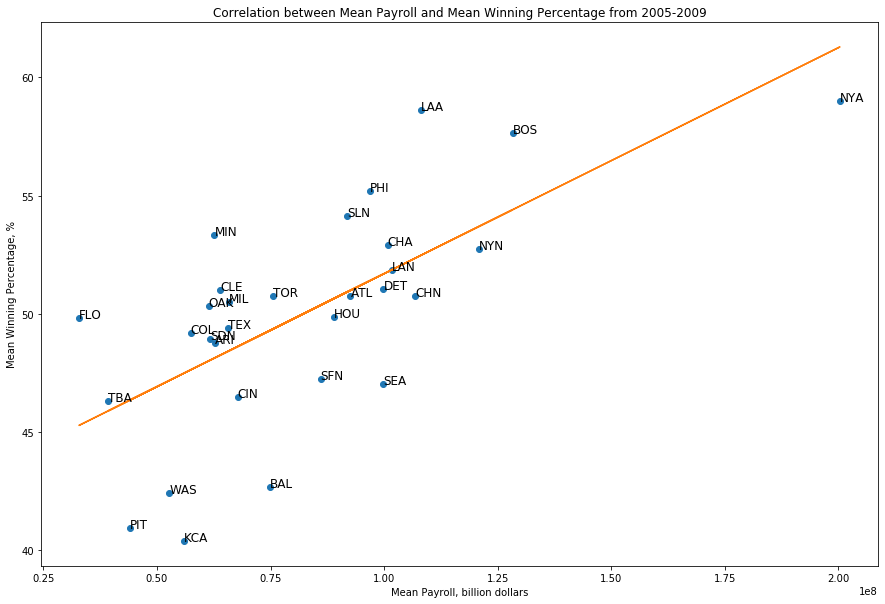

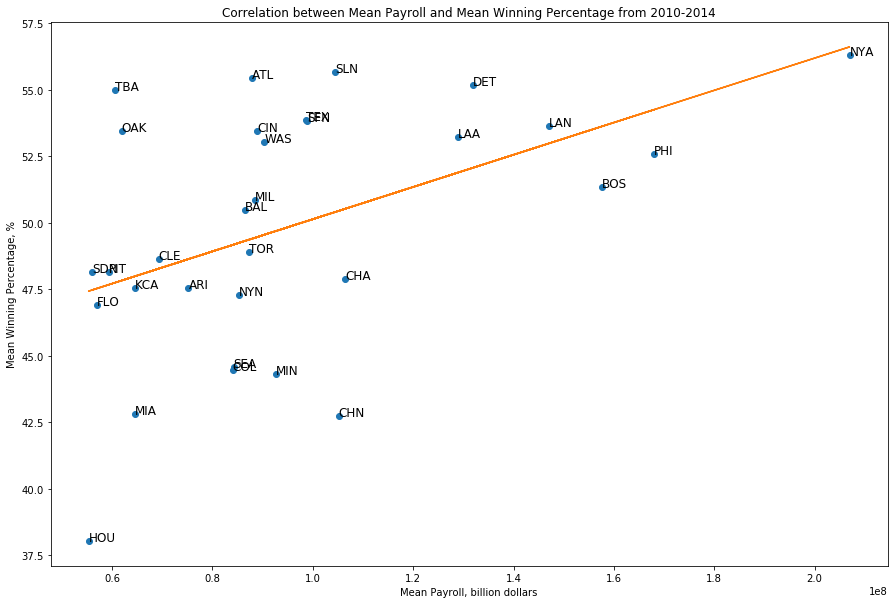

In [64]:
# Select necessary columns and order data frame by year
table = join[['yearID', 'teamID', 'total_payroll', 'win_percentage']]
table = years_table.merge(table, how = 'left', left_on = ['yearID'], right_on = ['yearID'])

# Adding a new column to the dat frame that specifies the time period of each row
periods = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
table['time_period'] = pd.cut(table['yearID'], right = False, bins = 5, labels = periods)

# Plot graph for every period
for p in periods:
    
    # Extract data for current time period
    temp = table.groupby(['time_period']).get_group(p)
    
    # Compute mean payroll for each team in current time period
    mean_payroll = (temp.groupby(['teamID']))['total_payroll'].mean()
    
    # Compute mean win rate for each team in current time period
    mean_win_rate = (temp.groupby(['teamID']))['win_percentage'].mean()
    
    # Merge two table 
    mean_payroll = mean_payroll.to_frame()
    mean_win_rate = mean_win_rate.to_frame()
    mean_win_rate = mean_payroll.merge(mean_win_rate, how = 'inner', left_on = ['teamID'], right_on = ['teamID'])
    
    # Plot graph
    x_data = mean_win_rate['total_payroll'].values
    y_data = mean_win_rate['win_percentage'].values
    m, b = np.polyfit(x = x_data, y = y_data, deg = 1)
    plt.figure(figsize = (15, 10))
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, m*x_data + b)
    
    # Specify team name for each data point on the graph
    for i, name in enumerate(mean_win_rate.index):
        plt.annotate(name, (x_data[i], y_data[i]), size = 12)
        
    plt.title('Correlation between Mean Payroll and Mean Winning Percentage from ' + p)
    plt.xlabel('Mean Payroll, billion dollars')
    plt.ylabel('Mean Winning Percentage, %')
    plt.show()

### Question 2

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

There is a general trend that the higher the mean payroll, the higher the mean winning percentage. The line in each graph helps us see such trend more clearly. The New York Yankees (NYA) and the Boston Red Sox (BOS) in particular tend to spend more for wins, although their spending efficiency are not as good in the last ten years (spending a lot but not winning as much). The Oakland A (OAK), on the other hand, is a great example of high spending efficiency. It started out spending a lot and over the years, it has obtained a high winning percentage while spending very little compared to the rest of the teams in each time period. We can visualize the spending efficiency better by observing the relationship between each point (team) with the line (average spending and winning ratio). If the points are placed above the line, they tend to have a good spending efficiency, while the points placed below the line do not.

## Part 3: Data transformations

### Standardizing across years

### Problem 5

In [65]:
# Compute mean and std of payrolls for each year
mean_payroll = (table.groupby(['yearID']))['total_payroll'].mean()
std_payroll = (table.groupby(['yearID']))['total_payroll'].std()
mean_payroll = mean_payroll.to_frame()
std_payroll = std_payroll.to_frame()
# Merge the mean and std table into a single table
mean_and_std = mean_payroll.merge(std_payroll, how = 'inner', left_on = mean_payroll.index, right_on = std_payroll.index)
mean_and_std.columns = ['yearID', 'mean_payroll', 'std_payroll']

# Iterate through mean_and_std table and original table
table['std_payroll'] = 0.0
for i, row1 in table.iterrows():
    for j, row2 in mean_and_std.iterrows():
        # Find matches
         if row1['yearID'] == row2['yearID']:
                # Compute standardized payroll
                table.at[i, 'std_payroll'] = (table['total_payroll'][i] - mean_and_std['mean_payroll'][j]) / mean_and_std['std_payroll'][j]

table

,yearID,teamID,total_payroll,win_percentage,time_period,std_payroll
0,1990,ATL,14555501.0,40.123457,1990-1994,-0.667275
1,1990,BAL,9680084.0,47.204969,1990-1994,-1.959861
2,1990,BOS,20558333.0,54.320988,1990-1994,0.924213
3,1990,CAL,21720000.0,49.382716,1990-1994,1.232198
4,1990,CHA,9491500.0,58.024691,1990-1994,-2.009859
5,1990,CHN,13624000.0,47.530864,1990-1994,-0.914238
6,1990,CIN,14370000.0,56.172840,1990-1994,-0.716456
7,1990,CLE,14487000.0,47.530864,1990-1994,-0.685437
8,1990,DET,17593238.0,48.765432,1990-1994,0.138098
9,1990,HOU,18330000.0,46.296296,1990-1994,0.333431


### Problem 6

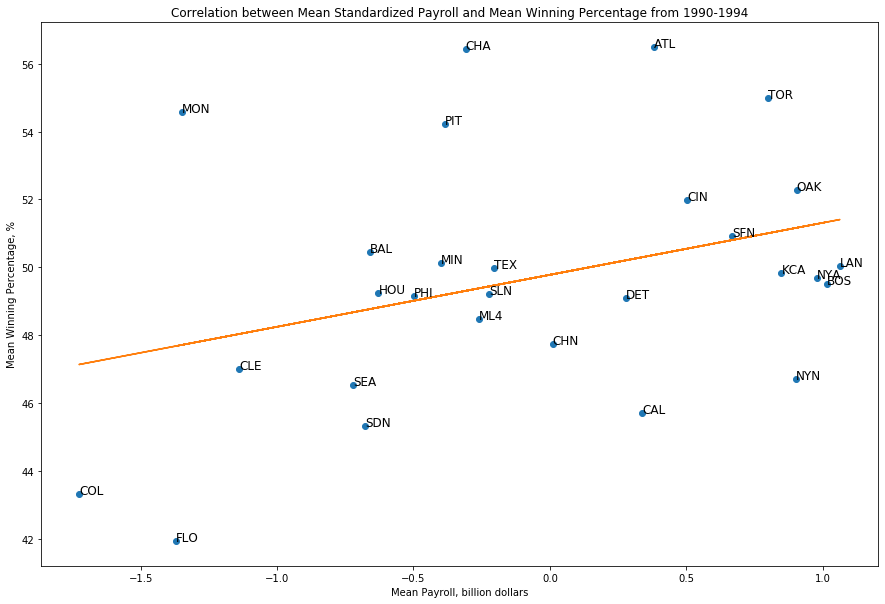

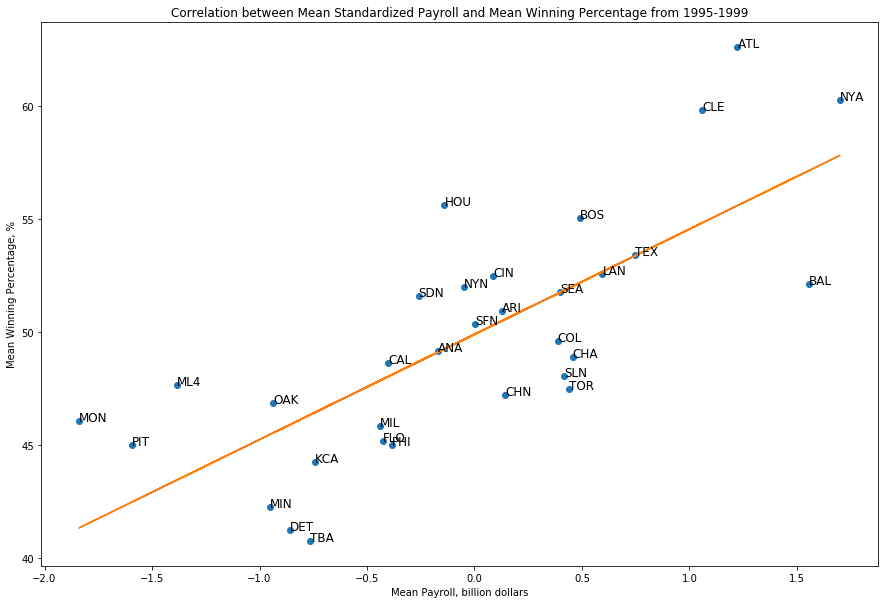

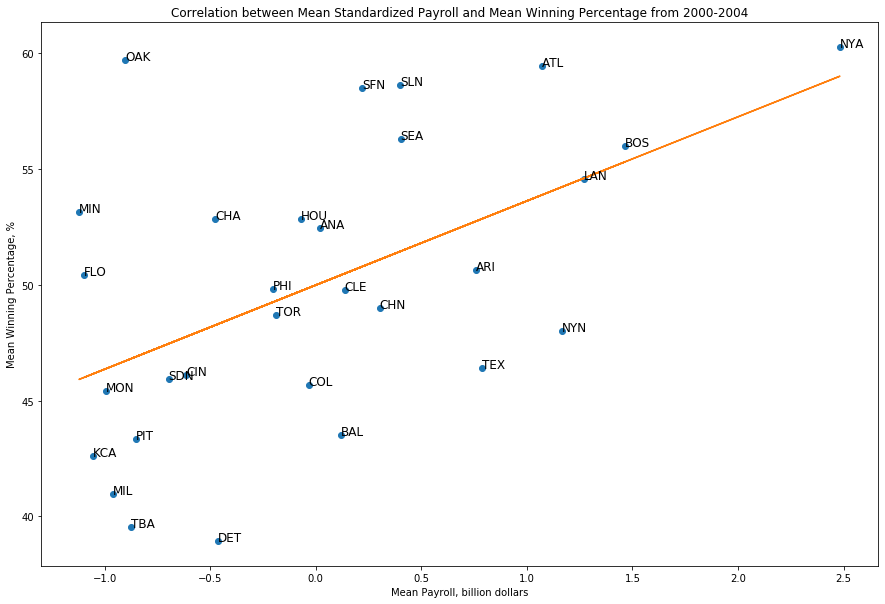

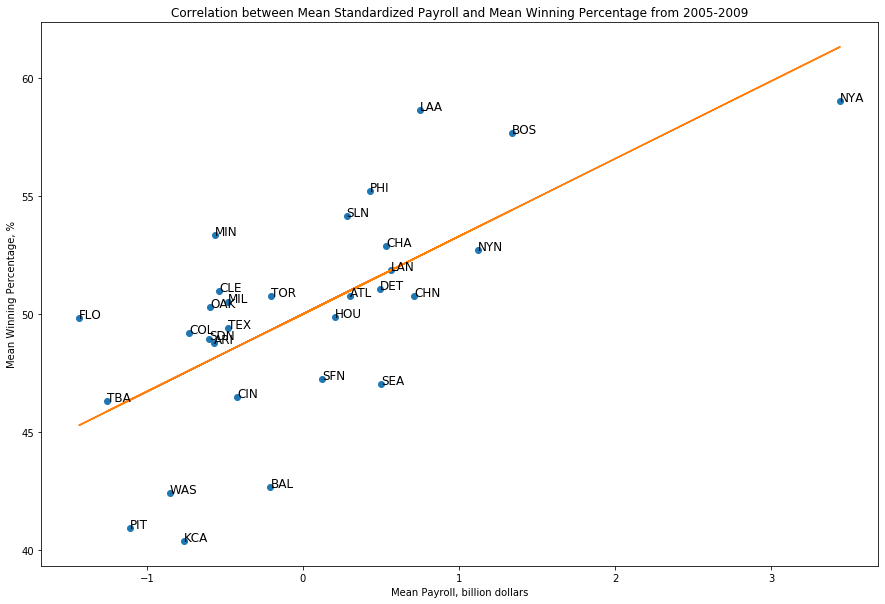

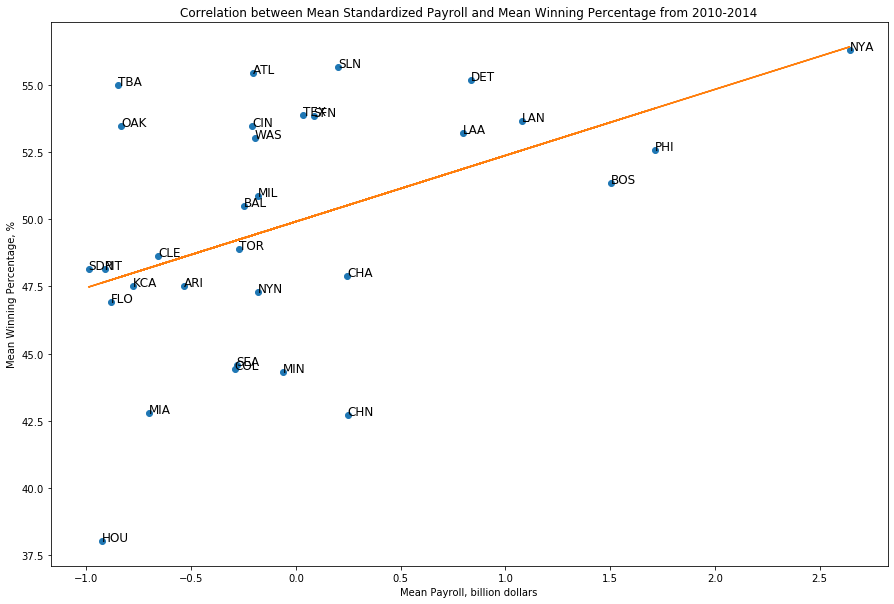

In [66]:
# Plot graph for every period
for p in periods:
    
    # Extract data for current time period
    temp = table.groupby(['time_period']).get_group(p)
    
    # Compute mean standardized payroll for each team in current time period
    mean_std_payroll = (temp.groupby(['teamID']))['std_payroll'].mean()
    
    # Compute mean win rate for each team in current time period
    mean_win_rate = (temp.groupby(['teamID']))['win_percentage'].mean()
    
    # Merge two table 
    std = mean_std_payroll.to_frame()
    mean_win_rate = mean_win_rate.to_frame()
    mean_win_rate = std.merge(mean_win_rate, how = 'inner', left_on = ['teamID'], right_on = ['teamID'])
    
    # Plot graph
    x_data = mean_win_rate['std_payroll'].values
    y_data = mean_win_rate['win_percentage'].values
    m, b = np.polyfit(x = x_data, y = y_data, deg = 1)
    plt.figure(figsize = (15, 10))
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, m*x_data + b)
    
    # Specify team name for each data point on the graph
    for i, name in enumerate(mean_win_rate.index):
        plt.annotate(name, (x_data[i], y_data[i]), size = 12)
        
    plt.title('Correlation between Mean Standardized Payroll and Mean Winning Percentage from ' + p)
    plt.xlabel('Mean Payroll, billion dollars')
    plt.ylabel('Mean Winning Percentage, %')
    plt.show()

### Question 3

Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.

Plots from both problem 4 and problem 6 are almost the same in terms of the increasing trend and the scatter of the data are both similar in every time period. The most noticeable difference between the two graphs are the scales of the x-axes. The mean payroll for problem 4's graph is always positive, while the standardized payroll in problem 6's graph ranges from -3 to 3. Problem 4's graph makes it easier for us to see the actual mean payrolls, but difficult to compare the scatterplots to with one another. Problem 6's graph, on the other hand, makes it easier for us to compare the scatterplots of different time periods. In other words, we could observe how many standard deviations away from the mean payroll each team's payroll is. A positive standard deviation implies that the team's payroll lies above the mean payroll, while a negative standard deviation suggests the team's payoll lies below the mean payroll.

### Expected wins

### Problem 7

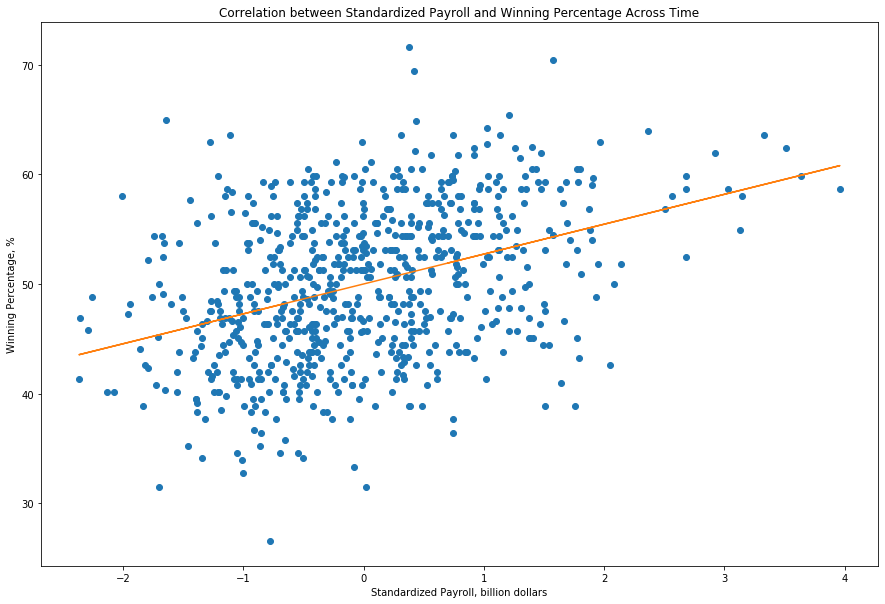

In [67]:
# Get required columns
x_data = table['std_payroll'].values
y_data = table['win_percentage'].values

# Plot graph
m, b = np.polyfit(x = x_data, y = y_data, deg = 1)
plt.figure(figsize = (15, 10))
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, m*x_data + b)

plt.title('Correlation between Standardized Payroll and Winning Percentage Across Time')
plt.xlabel('Standardized Payroll, billion dollars')
plt.ylabel('Winning Percentage, %')
plt.show()

### Spending efficiency

### Problem 8

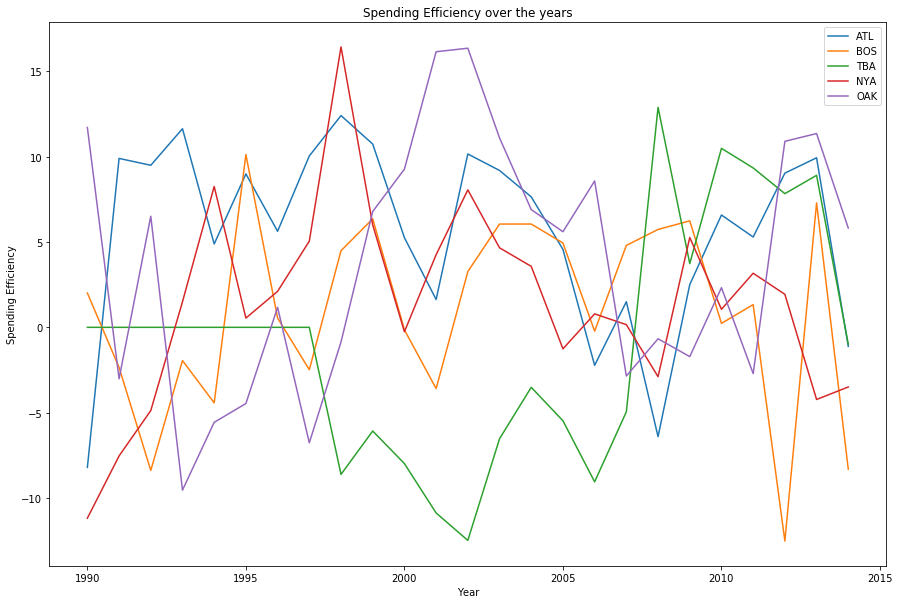

In [68]:
# Compute efficiency
table['expected_win_percentage'] = 0.0
table['efficiency'] = 0.0
std = table['std_payroll'].values
for i, row1 in enumerate(std):
    table.at[i, 'expected_win_percentage']= row1 * 2.5 + 50

for i in table.index:
    table.at[i, 'efficiency'] = table.at[i, 'win_percentage'] - table.at[i, 'expected_win_percentage']

# create DF for year 1990 to 2014
years = np.arange(1990, 2015)
years_table = pd.DataFrame(columns = ['yearID'], data = years)
teams = {'OAK', 'BOS', 'NYA', 'ATL', 'TBA'}
data = {}

# plot graph
plt.figure(figsize = (15,10))
plt.title('Spending Efficiency over the years')
plt.xlabel("Year")
plt.ylabel("Spending Efficiency")

for i in teams:
    temp = table[['yearID', 'teamID', 'efficiency']].groupby(['teamID']).get_group(i)
    
    data[i] = years_table.merge(temp, how = 'left', left_on = ['yearID'], right_on = ['yearID'])
    plt.plot(data[i]['yearID'], data[i]['efficiency'].fillna(value=0), label = i)
    plt.legend()
    
plt.show()

### Question 4

What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?

From this plot we learned that Oakland A's spending efficiency is not as good as it looks as our conlcusions in question 2 and 3. Oakland A's spending efficiency peaked around the Moneyball period (2002), but it fluctuates throughout the rest of the years, just like other teams do. The reason for such fluctuation lies in the way we define the spending efficiency, which is how much the winning percentage per team per year deviates from the expected winning percentage per team per year. We can visualize the expected winning percentage in problem 7 and it is not hard to tell that they are all over the place, which leads to the drastic fluctutation of each line in problem 8. Hence, to make any concrete conclusion about the spending efficiency of any team, we need to take more aspects into considerations, such as how we define the spending efficiency itself and considering the actuall effect of the money spent, which could take years to have a full impact on the team performance.